In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv ("DOB_Permit_Issuance (1).csv")

In [5]:
data = data [['BOROUGH', 'House #' ,'Street Name','Job Type','Community Board' ,
        'Zip Code','Bldg Type', 'Work Type', 'Permit Status', 'Filing Status',
        'Permit Type','Filing Date','Issuance Date','Expiration Date', 'Job Start Date',
        'LATITUDE','LONGITUDE', 'NTA_NAME']]

In [6]:
data.head()

,BOROUGH,House #,Street Name,Job Type,Community Board,Zip Code,Bldg Type,Work Type,Permit Status,Filing Status,Permit Type,Filing Date,Issuance Date,Expiration Date,Job Start Date,LATITUDE,LONGITUDE,NTA_NAME
0,BROOKLYN,62,HANSON PLACE,A1,302,11217.0,2.0,PL,ISSUED,RENEWAL,PL,01/23/2009 12:00:00 AM,01/23/2009 12:00:00 AM,01/23/2010 12:00:00 AM,01/16/2008 12:00:00 AM,40.685414,-73.975096,Fort Greene
1,MANHATTAN,40,WEST 38 STREET,A3,105,10018.0,2.0,EQ,IN PROCESS,INITIAL,EQ,03/17/2011 12:00:00 AM,NaN,NaN,03/17/2011 12:00:00 AM,40.751531,-73.984105,Midtown-Midtown South
2,MANHATTAN,56,EDGECOMBE AVENUE,A2,110,10030.0,2.0,OT,IN PROCESS,INITIAL,EW,11/21/2003 12:00:00 AM,NaN,NaN,11/21/2003 12:00:00 AM,40.818629,-73.946786,Central Harlem North-Polo Grounds
3,MANHATTAN,666,FIFTH AVENUE,A2,105,10103.0,2.0,SP,IN PROCESS,INITIAL,EW,09/07/2011 12:00:00 AM,NaN,NaN,09/07/2011 12:00:00 AM,40.760549,-73.976421,Midtown-Midtown South
4,BROOKLYN,6755,5 AVENUE,A2,310,11220.0,1.0,OT,IN PROCESS,INITIAL,EW,10/07/2002 12:00:00 AM,NaN,NaN,10/07/2002 12:00:00 AM,40.634515,-74.020573,Bay Ridge


# Let's get just the new buildings:

In [7]:
new_buildings_data = data [(data['Permit Type'] == 'NB') & (data['Permit Status'] == 'ISSUED')]


In [8]:
import re

year = [ ]
month = [ ]
for data in new_buildings_data ['Issuance Date']:
    y = re.findall ('(\d{4})', str (data))
    m = re.findall ('^[\d{2}]+', str (data))
    year.append (y)
    month.append (m)

#Let’s now inserts this new data into a new column:

new_buildings_data ['Issuance Year'] = year
new_buildings_data ['Issuance Month'] = month

new_buildings_data ['Issuance Year'] = new_buildings_data ['Issuance Year'].str[0]
new_buildings_data ['Issuance Month'] = new_buildings_data ['Issuance Month'].str[0]


In [9]:
try:
    new_buildings_data ['Issuance Year'] = new_buildings_data ['Issuance Year'].astype(int)
except ValueError:
    new_buildings_data ['Issuance Year'] = new_buildings_data ['Issuance Year'].astype(None)

In [10]:
new_buildings_since_2010 = new_buildings_data[new_buildings_data['Issuance Year'] >= 2010]

# New Buildings in NYC since 2010:

<BarContainer object of 10 artists>

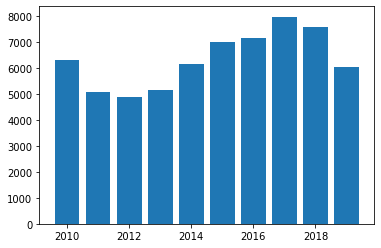

In [11]:

new_buildings_since_2010_count = new_buildings_since_2010['Issuance Year'].value_counts()

plt.bar (new_buildings_since_2010_count.index, new_buildings_since_2010_count.values, width = 0.8 ) 


# Divide data by borough:

In [12]:
new_buildings_manhattan_since2010 = new_buildings_since_2010 [new_buildings_data ['BOROUGH'] == 'MANHATTAN']

new_buildings_brooklyn_since2010= new_buildings_since_2010 [new_buildings_data ['BOROUGH'] == 'BROOKLYN']

new_buildings_queens_since2010 = new_buildings_since_2010 [new_buildings_data['BOROUGH'] == 'QUEENS']

new_buildings_bronx_since2010= new_buildings_since_2010 [new_buildings_data['BOROUGH'] == 'BRONX']

new_buildings_si_since2010 = new_buildings_since_2010 [new_buildings_data['BOROUGH'] == 'STATEN ISLAND']

In [13]:
number_new_buildings_manhattan_since2010= new_buildings_manhattan_since2010["Issuance Year"].value_counts( )
number_new_buildings_brooklyn_since2010= new_buildings_brooklyn_since2010["Issuance Year"].value_counts( )
number_new_buildings_queens_since2010 = new_buildings_queens_since2010["Issuance Year"].value_counts( )
number_new_buildings_bronx_since2010 = new_buildings_bronx_since2010["Issuance Year"].value_counts( )
number_new_buildings_si_since2010 = new_buildings_si_since2010["Issuance Year"].value_counts()

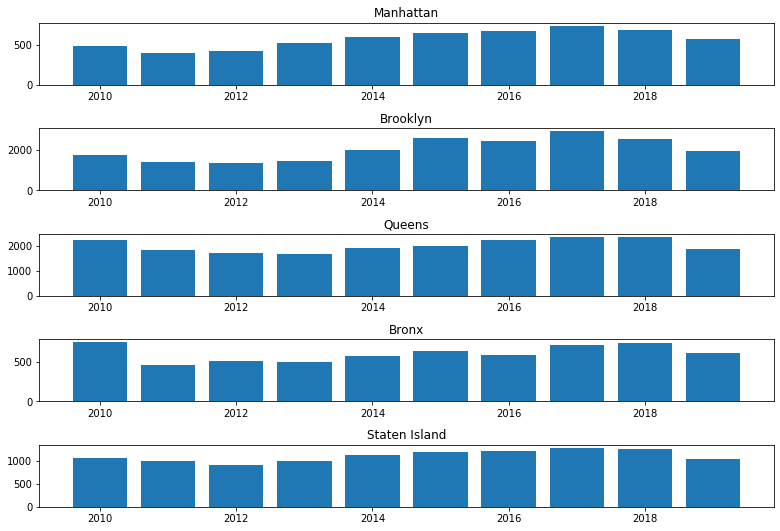

In [14]:
fig, axs = plt.subplots(5, figsize=(12, 8))

axs[0].bar(number_new_buildings_manhattan_since2010.index , number_new_buildings_manhattan_since2010.values)
axs[0].set (title="Manhattan")

axs[1].bar(number_new_buildings_brooklyn_since2010.index,number_new_buildings_brooklyn_since2010.values)
axs[1].set (title = "Brooklyn")

axs[2].bar(number_new_buildings_queens_since2010.index,number_new_buildings_queens_since2010.values)
axs[2].set (title = "Queens")

axs[3].bar(number_new_buildings_bronx_since2010.index,number_new_buildings_bronx_since2010.values)
axs[3].set (title = "Bronx")

axs[4].bar(number_new_buildings_si_since2010.index,number_new_buildings_si_since2010.values)
axs[4].set (title = "Staten Island")

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.70,
                    wspace=0.70)


# Divide the data into community districts:

# Bronx:

In [15]:
new_buildings_bronx_since_2010 = new_buildings_since_2010[new_buildings_since_2010['BOROUGH'] =='BRONX']

bronx_community_districts =  new_buildings_bronx_since_2010['Community Board'].value_counts ( )

In [16]:
bx_nb_since_2010_by_cb = [ ]
for i in bronx_community_districts.index:
    x = new_buildings_bronx_since_2010 [new_buildings_bronx_since_2010['Community Board']== i]
    bx_nb_since_2010_by_cb.append (x)


In [17]:
bx_cb12_nb_count = bx_nb_since_2010_by_cb[0]["Issuance Year"].value_counts()

In [18]:
bx_cb12_nb_count

2010.0    167
2018.0    119
2012.0    119
2015.0    107
2017.0    104
2019.0     96
2013.0     96
2014.0     94
2011.0     89
2016.0     88
Name: Issuance Year, dtype: int64

In [19]:
bx_cb12_nb_count_avg = np.average (bx_cb12_nb_count )

In [20]:
#Since 2010, cb 12 in The Bronx had an average of 107.9 new buildings per year

bx_cb12_nb_count_avg

107.9

In [21]:
# If I want to know the average number of new buildings per month:

(1/12) * bx_cb12_nb_count_avg

8.991666666666667

In [22]:
# If I want to know the probability that 10 buildings are built in 2 months:

# First I need to find the average buildings of two month:

bx_cb12_nb_2months_avg = (2/12) * bx_cb12_nb_count_avg



# New Buildings in The Bronx 2017 and 2018 to calculate geometric distr prob.

In [23]:
new_buildings_data_bronx  = new_buildings_data [new_buildings_data["BOROUGH"]=="BRONX"]

In [24]:
new_buildings_data_bx_017_018 = new_buildings_data_bronx [(new_buildings_data["Issuance Year"]>= 2017) 
                                                    &(new_buildings_data["Issuance Year"]<2019)]

In [25]:
new_buildings_data_bx_017_018_counts = pd.Series(new_buildings_data_bx_017_018 ["Community Board"].
                                                 astype(int).value_counts())

new_buildings_data_bx_017_018_counts.iloc[0] = new_buildings_data_bx_017_018_counts.iloc[0] + 3

new_buildings_data_bx_017_018_counts = new_buildings_data_bx_017_018_counts.drop (labels = [12])

In [26]:
new_buildings_data_bx_017_018_counts

212    231
210    172
201    158
206    131
209    129
204    114
207    103
203     97
208     90
202     82
211     73
205     71
Name: Community Board, dtype: int64

In [27]:
avg_nb_cb12_017_018 = new_buildings_data_bx_017_018_counts[212] / sum (new_buildings_data_bx_017_018_counts)

In [28]:
"The total average of new buildings constructed in cb 12 in 2017 and 2017 was " + str (avg_nb_cb12_017_018)

'The total average of new buildings constructed in cb 12 in 2017 and 2017 was 0.15920055134390076'

In [29]:
new_buildings_data_bronx

,BOROUGH,House #,Street Name,Job Type,Community Board,Zip Code,Bldg Type,Work Type,Permit Status,Filing Status,Permit Type,Filing Date,Issuance Date,Expiration Date,Job Start Date,LATITUDE,LONGITUDE,NTA_NAME,Issuance Year,Issuance Month
535,BRONX,1633,MACE AVENUE,NB,211,10469.0,2.0,NaN,ISSUED,INITIAL,NB,10/25/2002 12:00:00 AM,10/25/2002 12:00:00 AM,10/25/2003 12:00:00 AM,10/25/2002 12:00:00 AM,40.862682,-73.838582,Allerton-Pelham Gardens,2002.0,10
684,BRONX,953,TILDEN ST,NB,212,10469.0,1.0,NaN,ISSUED,INITIAL,NB,03/27/2019 12:00:00 AM,03/27/2019 12:00:00 AM,09/27/2019 12:00:00 AM,03/27/2019 12:00:00 AM,40.876824,-73.858139,Williamsbridge-Olinville,2019.0,03
2421,BRONX,963,BRADY AVENUE,NB,211,10462.0,1.0,NaN,ISSUED,INITIAL,NB,11/17/2016 12:00:00 AM,11/17/2016 12:00:00 AM,05/18/2017 12:00:00 AM,11/17/2016 12:00:00 AM,40.852292,-73.860816,Pelham Parkway,2016.0,11
3231,BRONX,2061,NARRAGANSETT AVE.,NB,211,10461.0,1.0,NaN,ISSUED,RENEWAL,NB,08/10/2017 12:00:00 AM,08/10/2017 12:00:00 AM,08/10/2018 12:00:00 AM,03/08/2017 12:00:00 AM,40.856488,-73.851513,Pelham Parkway,2017.0,08
4084,BRONX,830,FOX STREET,NB,202,10459.0,2.0,NaN,ISSUED,RENEWAL,NB,10/26/2007 12:00:00 AM,10/31/2007 12:00:00 AM,10/31/2008 12:00:00 AM,09/25/2006 12:00:00 AM,40.817576,-73.896232,Hunts Point,2007.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3598860,BRONX,1193,FULTON AVENUE,NB,203,10456.0,2.0,NaN,ISSUED,RENEWAL,NB,04/09/2018 12:00:00 AM,04/09/2018 12:00:00 AM,04/08/2019 12:00:00 AM,10/27/2017 12:00:00 AM,40.829992,-73.904943,Claremont-Bathgate,2018.0,04
3598870,BRONX,1193,FULTON AVENUE,NB,203,10456.0,2.0,NaN,ISSUED,RENEWAL,NB,04/08/2019 12:00:00 AM,04/08/2019 12:00:00 AM,04/07/2020 12:00:00 AM,10/27/2017 12:00:00 AM,40.829992,-73.904943,Claremont-Bathgate,2019.0,04
3599216,BRONX,1225,UNION AVE,NB,203,10459.0,2.0,NaN,ISSUED,RENEWAL,NB,10/21/2019 12:00:00 AM,10/21/2019 12:00:00 AM,10/20/2020 12:00:00 AM,10/17/2018 12:00:00 AM,40.829389,-73.899105,Morrisania-Melrose,2019.0,10
3599356,BRONX,268,WEST 261ST STREET,NB,208,10471.0,1.0,NaN,ISSUED,INITIAL,NB,10/22/2019 12:00:00 AM,10/22/2019 12:00:00 AM,10/10/2020 12:00:00 AM,10/22/2019 12:00:00 AM,40.909605,-73.898097,North Riverdale-Fieldston-Riverdale,2019.0,10


In [30]:
new_buildings_data_bronx["Issuance Year"].value_counts()

2006.0    2724
2007.0    2370
2005.0    2346
2004.0    1913
2008.0    1520
2003.0    1490
2002.0    1431
2001.0    1312
2009.0    1301
1992.0    1273
2000.0    1099
1993.0    1066
1994.0     780
1996.0     765
1998.0     764
1991.0     759
2010.0     752
2018.0     740
1999.0     729
1995.0     717
2017.0     711
1997.0     646
2015.0     637
2019.0     619
2016.0     588
2014.0     577
2012.0     515
2013.0     502
2011.0     460
1990.0     182
Name: Issuance Year, dtype: int64

In [31]:
data_by_year_and_month = new_buildings_data_bronx.groupby("Issuance Year")["Issuance Month"].value_counts().sort_index()

In [32]:
pd.set_option('display.max_rows', None) 

In [33]:
data_by_year_and_month

Issuance Year  Issuance Month
1990.0         03                  2
               04                  6
               05                  5
               06                 16
               07                 43
               08                  5
               09                 27
               10                  9
               11                 50
               12                 19
1991.0         01                 22
               02                 26
               03                 26
               04                 69
               05                 75
               06                 34
               07                 32
               08                 86
               09                 55
               10                 14
               11                233
               12                 87
1992.0         01                160
               02                138
               03                124
               04                 50
        

In [34]:
def get_meand_and_std(data):
    years = np.arange (1990, 2020)
    mean_std_bx_by_year = {}
    for y in years:
        d = data[y]
        mean = d.mean()
        std = d.std()
        mean_std_bx_by_year[y] = {}
        mean_std_bx_by_year[y]["Mean"] = mean
        mean_std_bx_by_year[y]["Std"] = std 
    return mean_std_bx_by_year

In [35]:
mean_std_bx_by_year_dict = get_meand_and_std(data_by_year_and_month)

In [36]:
mean_std_bx_by_year_dict

{1990: {'Mean': 18.2, 'Std': 16.844385810510673},
 1991: {'Mean': 63.25, 'Std': 59.444588407264554},
 1992: {'Mean': 106.08333333333333, 'Std': 57.9740668251109},
 1993: {'Mean': 88.83333333333333, 'Std': 80.82060193397285},
 1994: {'Mean': 65.0, 'Std': 52.57548685634607},
 1995: {'Mean': 59.75, 'Std': 47.87127626154426},
 1996: {'Mean': 63.75, 'Std': 43.05202983283451},
 1997: {'Mean': 53.833333333333336, 'Std': 38.20954981375333},
 1998: {'Mean': 63.666666666666664, 'Std': 28.088604396973818},
 1999: {'Mean': 60.75, 'Std': 38.131649941652505},
 2000: {'Mean': 91.58333333333333, 'Std': 41.653240261022},
 2001: {'Mean': 109.33333333333333, 'Std': 56.48705939228806},
 2002: {'Mean': 119.25, 'Std': 42.04786233891953},
 2003: {'Mean': 124.16666666666667, 'Std': 40.25110576309072},
 2004: {'Mean': 159.41666666666666, 'Std': 73.81729082161188},
 2005: {'Mean': 195.5, 'Std': 53.995791081763535},
 2006: {'Mean': 227.0, 'Std': 58.95915381161621},
 2007: {'Mean': 197.5, 'Std': 53.26861603745168

In [37]:
bx_means = []
bx_std = []
for i in mean_std_bx_by_year_dict.keys():
    means = mean_std_bx_by_year_dict[i]["Mean"]
    stds = mean_std_bx_by_year_dict[i]["Std"]
    bx_means.append (means)
    bx_std.append (stds)

In [38]:
# The folling graph follows the central limit theorem probability of distribution, where the amount of new buildings
# since 1990 in the bronx are divivided by year and then we get the aerage of new buildings per year, and 
# plot them in a histogram. 

In [39]:
bx_bar_index = np.arange(len (bx_means))

<BarContainer object of 30 artists>

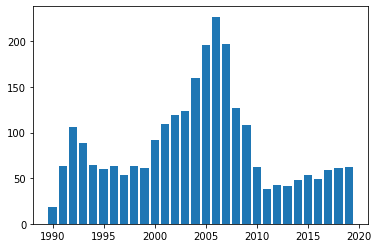

In [40]:
plt.bar (np.arange (1990, 2020), bx_means)

In [41]:
from scipy.stats import norm

In [42]:
norm.cdf (85, loc = 63, scale =5)

0.9999945874560923

In [45]:
# I have data for new buildings constructed in in the bronx since 1990 divided by year. 
# Each year has its own average and standard deviation. 
#With this information I can start making some Normal distribution calculations, such as:
# The probability that a specific month has more, less or equal amount of new buildings using "norm" from scipy


# For example, if I want to know the probability that in a randomly selected month in 1993, MORE THAN 34 buildings 
# were constructed, I would write:

#P(xZ)

print (1 - norm.cdf (34, loc = 106.08333333333333, scale =57.9740668251109 ))

# If I want to know the probability that in 1992 in a randomly selected month LESS THAN 34 buildings were
# constructed, I would write:


print (norm.cdf (34, loc = 106.08333333333333, scale =57.9740668251109 ))


0.8931346144222905
0.10686538557770958


In [44]:
mean_std_bx_by_year_dict

{1990: {'Mean': 18.2, 'Std': 16.844385810510673},
 1991: {'Mean': 63.25, 'Std': 59.444588407264554},
 1992: {'Mean': 106.08333333333333, 'Std': 57.9740668251109},
 1993: {'Mean': 88.83333333333333, 'Std': 80.82060193397285},
 1994: {'Mean': 65.0, 'Std': 52.57548685634607},
 1995: {'Mean': 59.75, 'Std': 47.87127626154426},
 1996: {'Mean': 63.75, 'Std': 43.05202983283451},
 1997: {'Mean': 53.833333333333336, 'Std': 38.20954981375333},
 1998: {'Mean': 63.666666666666664, 'Std': 28.088604396973818},
 1999: {'Mean': 60.75, 'Std': 38.131649941652505},
 2000: {'Mean': 91.58333333333333, 'Std': 41.653240261022},
 2001: {'Mean': 109.33333333333333, 'Std': 56.48705939228806},
 2002: {'Mean': 119.25, 'Std': 42.04786233891953},
 2003: {'Mean': 124.16666666666667, 'Std': 40.25110576309072},
 2004: {'Mean': 159.41666666666666, 'Std': 73.81729082161188},
 2005: {'Mean': 195.5, 'Std': 53.995791081763535},
 2006: {'Mean': 227.0, 'Std': 58.95915381161621},
 2007: {'Mean': 197.5, 'Std': 53.26861603745168

In [46]:
print (norm.pdf (34, loc = 106.08333333333333, scale =57.9740668251109 ))

0.003176671506717949
